In [2]:
import matplotlib.pyplot as plt
import numpy as np
from subprocess import call
import re
from collections import OrderedDict
import math

def Clock2NanoSec(clock):
    return clock/2.801

def Clock2USec(clock):
    return clock/2801

def SigmaFilter(data):
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    return data

def LoadData(filepath):
    data = OrderedDict()
    for line in open(filepath).readlines():
        fields = line.split(":\t")
        samples = data.get(int(fields[0]), [])
        samples.append(Clock2USec(float(fields[1])))
        data[int(fields[0])] = samples
    return data

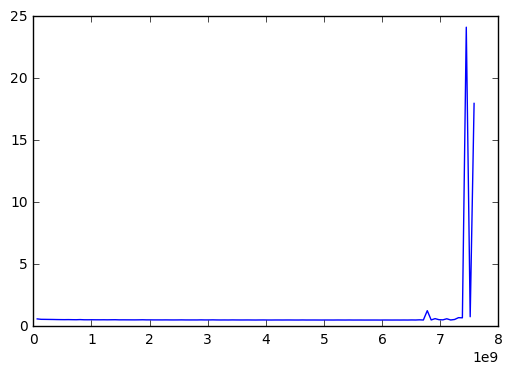

In [4]:
def AnalyzeFileCache(filepath):
    data = LoadData(filepath)
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)

    plt.plot(avg.keys(), avg.values())
    plt.show()
AnalyzeFileCache('filecache.result')
    
    

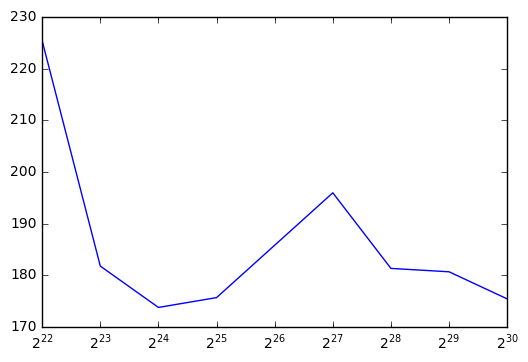

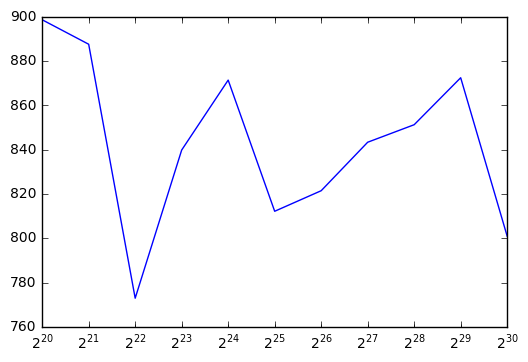

OrderedDict([(4194304, 225.35247445805066), (8388608, 181.76574200621207), (16777216, 173.76385800924669), (33554432, 175.66565701460192), (67108864, 185.80234233359516), (134217728, 195.94846452674045), (268435456, 181.31788463109604), (536870912, 180.66315407554444), (1073741824, 175.41959269685827)])
OrderedDict([(1048576, 898.69493121874325), (2097152, 887.64391693259552), (4194304, 772.95050152984652), (8388608, 839.86553361942151), (16777216, 871.4525920395572), (33554432, 812.21369869039631), (67108864, 821.4932289698321), (134217728, 843.39063217015359), (268435456, 851.3034938051054), (536870912, 872.51582534423414), (1073741824, 800.95364373031066)])


In [72]:
def AnalyzeSeqRead(filepath):
    data = LoadData(filepath)
        
    #filter
    fdata = OrderedDict()
    for k, v in data.iteritems():
        fdata[k] = SigmaFilter(v)
    data = fdata
    
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)

    plt.semilogx(avg.keys(), avg.values(), label='seq read', basex=2)
    plt.show()
    return avg

seqRead = AnalyzeSeqRead('seqread.result')
rSeqRead = AnalyzeSeqRead('rseqread.result')
print seqRead
print rSeqRead

OrderedDict([(4096, 699867.54730453412), (8192, 672072.5633702249), (16384, 595390.01695822924), (32768, 633791.26874330593), (65536, 655338.47286683321), (131072, 707384.23219385929), (262144, 704072.89667752595), (524288, 713372.22267163498), (1048576, 691058.52297447342), (2097152, 689185.28852704389), (4194304, 730265.83183523733), (8388608, 854248.84658586211), (16777216, 849836.6903395215), (33554432, 853083.01972099242), (67108864, 844703.89191083529), (134217728, 832035.35001651186)])


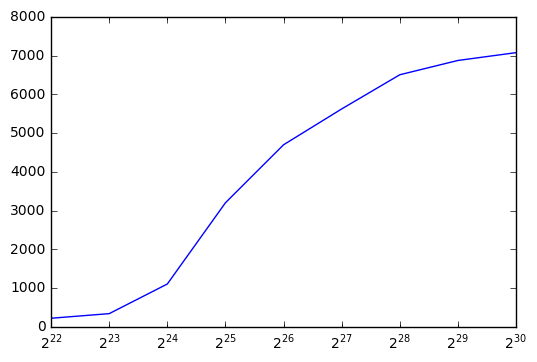

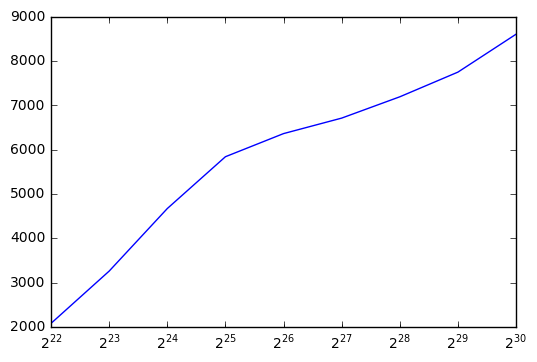

In [73]:
def AnalyzeRandRead(filepath):
    data = LoadData(filepath)
    
    #filter
    fdata = OrderedDict()
    for k, v in data.iteritems():
        fdata[k] = v[2:]
    data = fdata
    
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)

    plt.semilogx(avg.keys(), avg.values(), label='rand read', basex=2)
    plt.show()
    return avg

randRead = AnalyzeRandRead('randread.result')
rRandRead = AnalyzeRandRead('rrandread.result')

OrderedDict([(1, [169.6893241581578, 194.63197513530883, 173.08400302749018, 167.0053375908604, 183.7734653809354, 175.95251728525525, 170.03934745412352, 199.08569861085326, 169.97319820135667, 171.68369856229918]), (2, [383.42260870760447, 384.12417695144586, 385.5745608932524, 386.7569766822564, 382.8173692370582, 383.2139591435202, 381.77266513602285, 381.5238536329882, 405.0536836993931, 405.5220053527312, 377.20294264619776, 378.0105855030347, 359.6779830153517, 359.24412150374866, 402.3210029425205, 401.7188040621207, 787.5497216658337, 876.1097286815424, 1019.2535641503034, 934.3825070846127]), (3, [683.4058892695466, 692.5878030489112, 698.6933268743306, 601.0467758204212, 620.5789648925385, 605.7009644841129, 619.7565307290254, 643.2141375855051, 637.7732193445198, 602.4718173052481, 596.9824307001071, 600.666593465191, 632.5281115158872, 636.7806792852552, 642.0679963238128, 604.6598413338094, 604.0189300614066, 612.7129762181364, 609.5227957918601, 609.4538230146376, 607.60

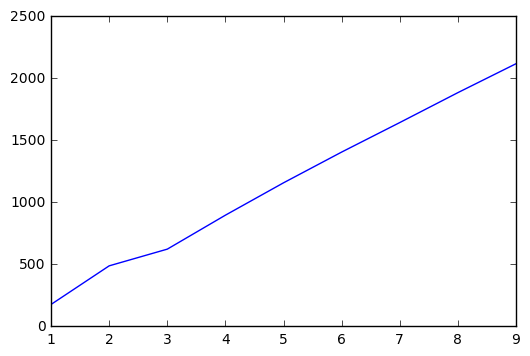

OrderedDict([(1, 177.49185654066406), (2, 488.76264103457686), (3, 623.47187088156613), (4, 897.43863861944828), (5, 1158.4704723497964), (6, 1406.3901422137631), (7, 1644.3982216439126), (8, 1885.724345804882), (9, 2118.9186595829306)])


In [57]:
def AnalyzeContentRead(filepath):
    data = LoadData(filepath)
    print data
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)
        
    plt.plot(avg.keys(), avg.values(), label='contention read')
    plt.show()
    return avg

contentRead = AnalyzeContentRead('contention.result')
print contentRead